# Import the necessary libraries

In [1]:
# import neccessay libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display, Markdown, Latex
from pathlib import Path
from joblib import dump, load
warnings.filterwarnings('ignore')

We have just imported python libraries that will be necessary for this task

## Loading the dataset

In [2]:
# to read the dataset data
df = pd.read_csv('Student_Data.csv')

# to view the dataframe
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Here, we loaded our dataset and view the data frame

## Data Preprocessing

In [3]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Target']= label_encoder.fit_transform(df['Target']) 
  
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


We applied LabelEncoder which is a practical tool for preprocessing categorical data for machine learning models, ensuring the data is in a suitable numeric format for processing.








## Checking the details of the Dataset

In [4]:
# list of numerical data types to look out for
numerics_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# list of categorical data types to look out for
categorical_dtypes = ['object', 'category', 'bool']

# get columns with numerical values
has_numerical = [e for e in df.columns if df[e].dtype.name in numerics_dtypes]

# get columns with categorical values
has_categorical = [e for e in df.columns if df[e].dtype.name in categorical_dtypes]

# print out the output
print('Columns with numerical values:', ', '.join(has_numerical))
print('\nColumns with categorical values:', ', '.join(has_categorical))

Columns with numerical values: Marital status, Application mode, Application order, Course, Daytime/evening attendance, Previous qualification, Previous qualification (grade), Nationality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Admission grade, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, International, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations), Unemployment rate, Inflation rate, GDP, Target

Columns with categorical values: 


# Exploratory Data Analysis (EDA)

In [5]:
# checking the dimension of the dataset
display(Markdown(f'This dataset contains {df.shape[0]} rows and {df.shape[1]} columns. Out of which, 1 is the target variable and the remaining are the independent variables.'))

This dataset contains 4424 rows and 37 columns. Out of which, 1 is the target variable and the remaining are the independent variables.

In [6]:
# checking the columns of the dataset
df.columns.tolist()

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nationality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rat

Here, we try to have a proper view of the columns in our dataset

In [7]:
# to check the data type of the columns
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nationality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [8]:
data_types = ', '.join(str(e) for e in df.dtypes.unique().tolist())
display(Markdown(f'There are {len(df.dtypes.unique().tolist())} different types of data ({data_types}) present in the dataset.'))

There are 3 different types of data (int64, float64, int32) present in the dataset.

## Checking Null or Missing Values in the Dataset

In [9]:
# to check for null values
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

The above result indicates there is no missing value in our dataset. Let visualize this through the heatmap below

### Visualizing the null/missing values using heatmap

<AxesSubplot:>

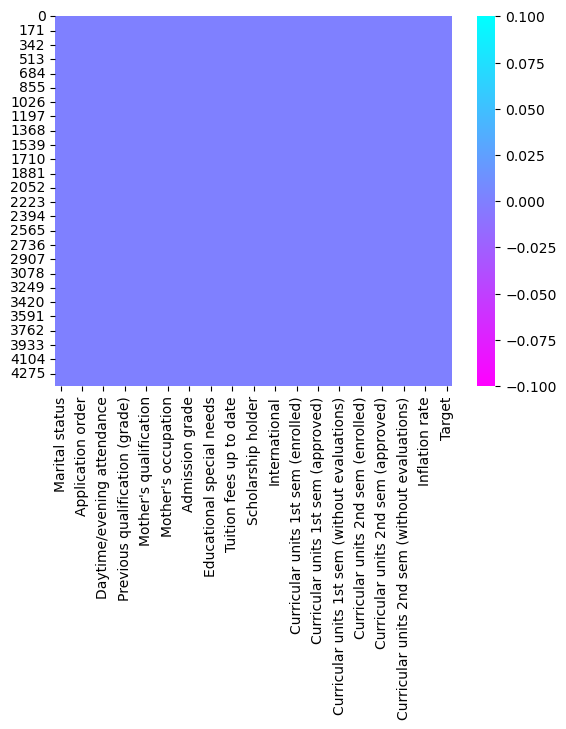

In [10]:
# to visualize the null values using heatmap
sns.heatmap(df.isnull(), cmap = "cool_r")

In [11]:
null_text = f'And we can clearly visualize that there are {sum(df.isnull().sum().tolist())} missing data present.' if sum(df.isnull().sum().tolist()) > 0 else 'And we can clearly visualize that there is no missing data present.'
display(Markdown(null_text))

And we can clearly visualize that there is no missing data present.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

The above function (df.info()), gives a brief information about the dataset which includes indexing type, column type, null values and memory usage.



## Lets see how many unique values present in each column of the dataset.

In [13]:
# to get the total number of unique values and thier data type present in each column
unique_values = []
for column in df.columns.tolist():
    unique_values.append([column, df[column].nunique(), df[column].dtype.name])
    
unique_df = pd.DataFrame(unique_values, columns=[['Column Name', 'Number of Unique Value', 'Column Data Type']])
unique_df

,Column Name,Number of Unique Value,Column Data Type
0,Marital status,6,int64
1,Application mode,18,int64
2,Application order,8,int64
3,Course,17,int64
4,Daytime/evening attendance,2,int64
5,Previous qualification,17,int64
6,Previous qualification (grade),101,float64
7,Nationality,21,int64
8,Mother's qualification,29,int64
9,Father's qualification,34,int64


The above table shows the number of unique values present in each column in our dataset

## Lets check the Target Variable

In [14]:
# checking the list of the target variable
target_values = df["Target"].unique().tolist()
target_values

[0, 2, 1]

There are three (3) Categories in our Target variable column. These are Dropout = 0, Enrolled = 1, and Graduate = 2.

In [15]:
display(Markdown(f"These are {len(target_values)} categories present in the target column namely {' and '.join([str(e) for e in target_values])}."))

These are 3 categories present in the target column namely 0 and 2 and 1.

In [16]:
df["Target"].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

this is or target variable count showing class imbalance as can be seen in their total count above.

## Dataset Description

In [17]:
# declared an empty list
skewed_right = []
skewed_left = []
found_outliers = []
outliers_columns = []


def find_outliers(column):
    global found_outliers, outliers_columns
    # finding the 1st quartile
    q1 = df[column].quantile(0.25)

    # finding the 3rd quartile
    q3 = df[column].quantile(0.75)

    # finding the iqr region
    iqr = q3 - q1

    # finding upper and lower whiskers
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)

    # Get the array data for column
    arr1 = df[column]

    # Get the outliers using the upper and lower whiskers
    outliers = arr1[(arr1 <= lower_bound) | (arr1 >= upper_bound)]
    
    if len(outliers.values) > 0:
        # append the found oultiers and the column name
        found_outliers.append(outliers.tolist())
        outliers_columns.append(column)
        
    return
            
def summary_table():
    for column in df.columns:
        # calculate the mean value
        mean_value = df[column].mean(axis=0)
    
        # calculate the median value
        median_value = df[column].median(axis=0)
    
        # check if colmun is skewed to the right
        if mean_value > median_value:
            skewed_right.append(column)
    
        # check if colmun is skewed to the left
        elif mean_value < median_value:
            skewed_left.append(column)
        
        # call the function to check for outliers
        find_outliers(column)
    
    # store the summary description text
    result_str = "This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present." + "\n" + \
    "1. The counts of all the columns are the same which means there are no missing values in the dataset." + "\n" + \
    f"2. The mean value is greater than median (50%) in '{', '.join([str(e) for e in skewed_right])}' columns which means the data is skewed to right in these column." + "\n" + \
    f"3. The data in the '{', '.join([str(e) for e in skewed_left])}' columns have mean value less tha median value which means the data is skewed to the left."
    
    # check if there were any outlier found and add text to description text
    if len(found_outliers[0]) > 0:
        result_str += "\n" + f"4. By summarizing the data we can observe that there is a huge difference between 75% and max in '{', '.join([str(e) for e in outliers_columns])}' columns hence there are outliers present in the data."
    
    else:
        result_str += "\n" + '4. By summarizing the data we can observe that there is no huge difference between 75% and max hence there are no outliers present in the data.'
    
    # add the final text to description text
    result_str += "\n" + "5. We can also notice the standard deviation, min, 25% percentile values from this described method."
    
    return result_str

In [18]:
# statistical summary of numerical columns
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In [19]:
# display the summary text using markdown
display(Markdown(summary_table()))

This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present.
1. The counts of all the columns are the same which means there are no missing values in the dataset.
2. The mean value is greater than median (50%) in 'Marital status, Application mode, Application order, Previous qualification, Nationality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Admission grade, Educational special needs, Debtor, Gender, Scholarship holder, Age at enrollment, International, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (without evaluations), Unemployment rate, Target' columns which means the data is skewed to right in these column.
3. The data in the 'Course, Daytime/evening attendance, Previous qualification (grade), Displaced, Tuition fees up to date, Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Inflation rate, GDP' columns have mean value less tha median value which means the data is skewed to the left.
4. By summarizing the data we can observe that there is a huge difference between 75% and max in 'Marital status, Application order, Course, Daytime/evening attendance, Previous qualification, Previous qualification (grade), Nationality, Mother's occupation, Father's occupation, Admission grade, Educational special needs, Debtor, Tuition fees up to date, Scholarship holder, Age at enrollment, International, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations)' columns hence there are outliers present in the data.
5. We can also notice the standard deviation, min, 25% percentile values from this described method.

lets visualize this here

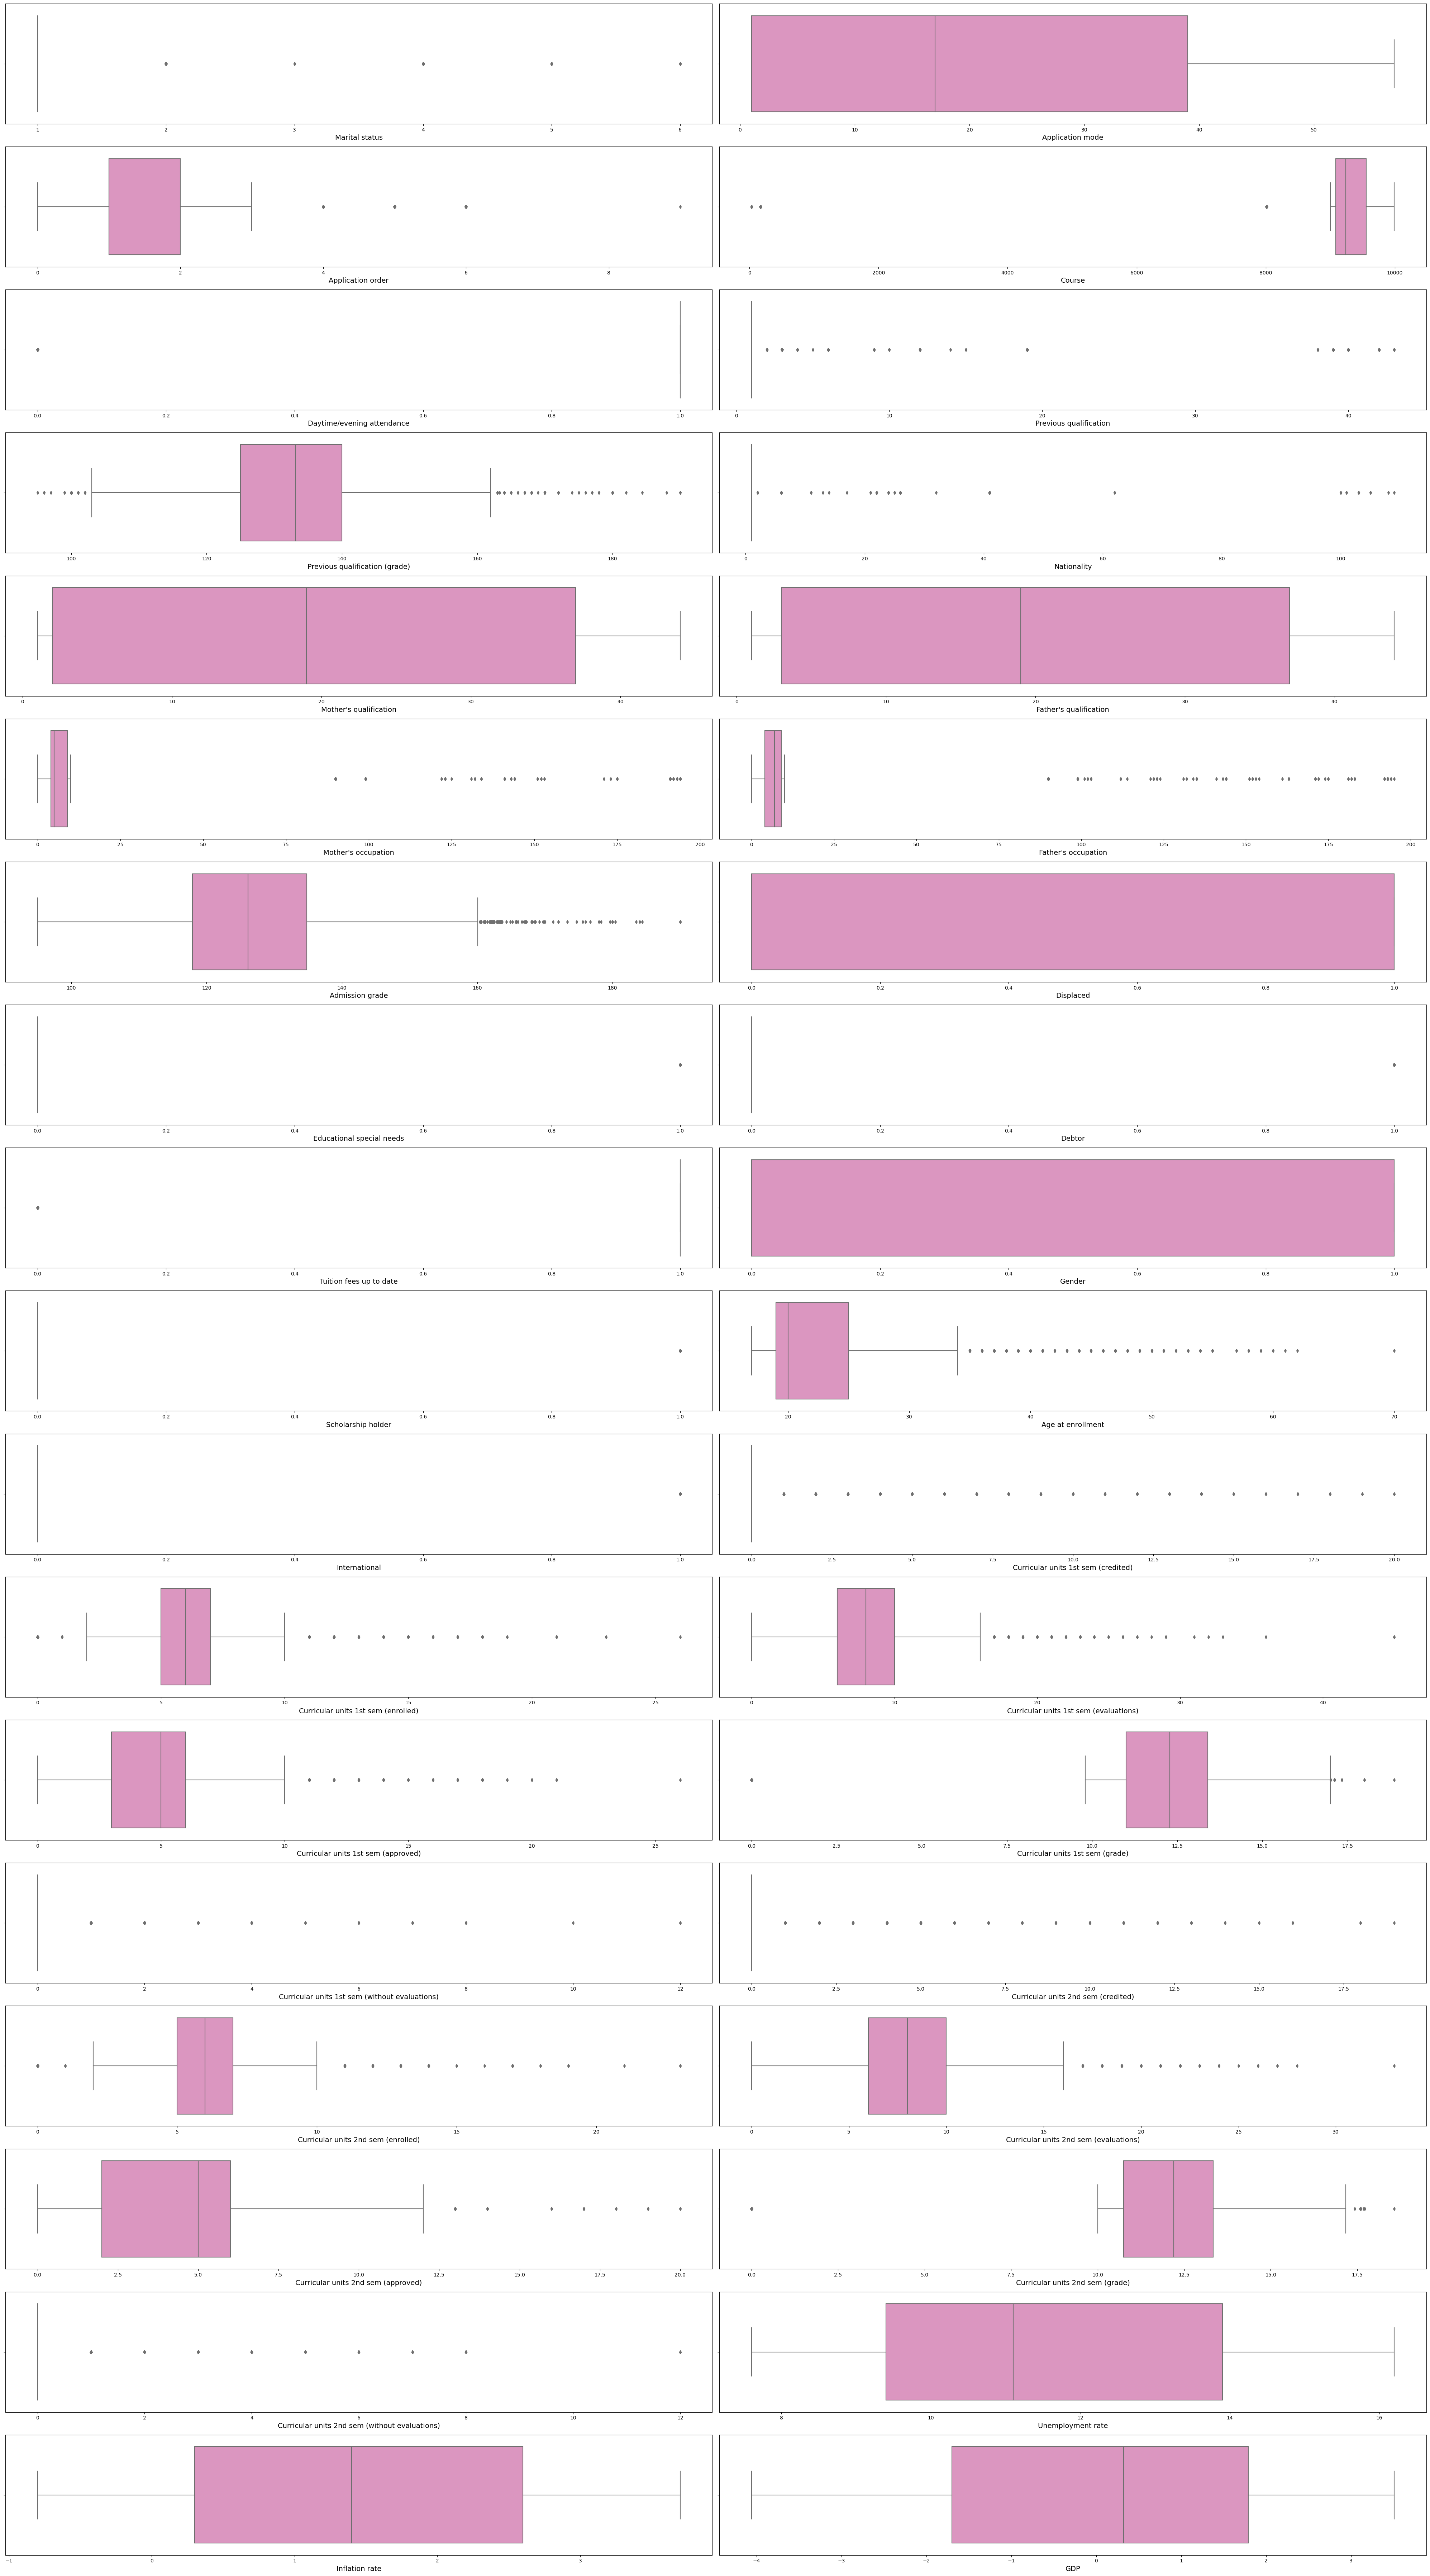

In [20]:
# to check the distribution of the remaining columns 
plot_number = 1

num_plots = len(has_numerical) - 1 if len(has_numerical)%2 != 0 else len(has_numerical)

plt.figure(figsize = (num_plots + 4, num_plots * 2), facecolor = "white")

outliers_columns = []

for column in has_numerical:
    # finding the 1st quartile
    q1 = df[column].quantile(0.25)

    # finding the 3rd quartile
    q3 = df[column].quantile(0.75)

    # finding the iqr region
    iqr = q3 - q1

    # finding upper and lower whiskers
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)

    # Get the array data for column
    arr1 = df[column]

    # Get the outliers using the upper and lower whiskers
    outliers = arr1[(arr1 <= lower_bound) | (arr1 >= upper_bound)]
    
    if len(outliers.values) > 0:
        # append the found oultiers and the column name
        found_outliers.append(outliers.tolist())
        outliers_columns.append(column)
        
    # plot the boxplots
    if plot_number <= num_plots:
        ax = plt.subplot(int(num_plots/2), 2, plot_number)
        sns.boxplot(df[column], palette = "Set2_r")
        plt.xlabel(column, fontsize = 14)
        plt.yticks(rotation = 0, fontsize = 14)
        
    plot_number += 1
    
plt.tight_layout()

There are outliers in the dataset as we can see from the above plot and we are mindful they might have undue influence on our dataset.

In [21]:
# assign the columns to remove outliers if necessary
# columns_to_remove_outliers = ['column1', 'columns2','...']
columns_to_remove_outliers = outliers_columns

## Hybrid outliers Handling Approach

In [22]:
# function to treat outliers
def treat_outliers(df, columns):
    try:
        # loop through all column list
        for column in columns:
            # finding the 1st quartile
            q1 = df[column].quantile(0.25)

            # finding the 3rd quartile
            q3 = df[column].quantile(0.75)

            # get the column mean and median values
            mean = df[column].mean()
            # median = df[column].median()

            # finding the iqr region
            iqr = q3 - q1

            # finding upper and lower whiskers
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)

            # Get the array data for column
            arr1 = df[column]

            # Get the outliers using the upper and lower whiskers
            outliers = arr1[(arr1 <= lower_bound) | (arr1 >= upper_bound)]

            # get the min value of the outliers found
            min_value = round(min(outliers.values)) if len(outliers.values) > 0 else 0

            # calculate the percentage of the outliers found
            percentage_value = round((len(outliers.values) / len(arr1)) * 100, 2) if len(outliers.values) > 0 else 0

            # do this if outliers is less than or equal to 5%
            if round(percentage_value) <= 5 and len(outliers.values) > 0:
                # capping Outliers using IQR Ranges
                df.loc[(df[column] <= lower_bound), column] = lower_bound
                df.loc[(df[column] >= upper_bound), column] = upper_bound

            # do this if outliers is greater than 5%
            elif round(percentage_value) > 5 and len(outliers.values) > 0:
                # replacing outlier values with the mean or median value
                df.loc[(df[column] <= lower_bound), column] = mean
                df.loc[(df[column] >= upper_bound), column] = mean


        # return 
        return 

    except BaseException as error:
        print('\nPlease ensure the dataframe name is correct and the target column is entered correctly: {}'.format(error))

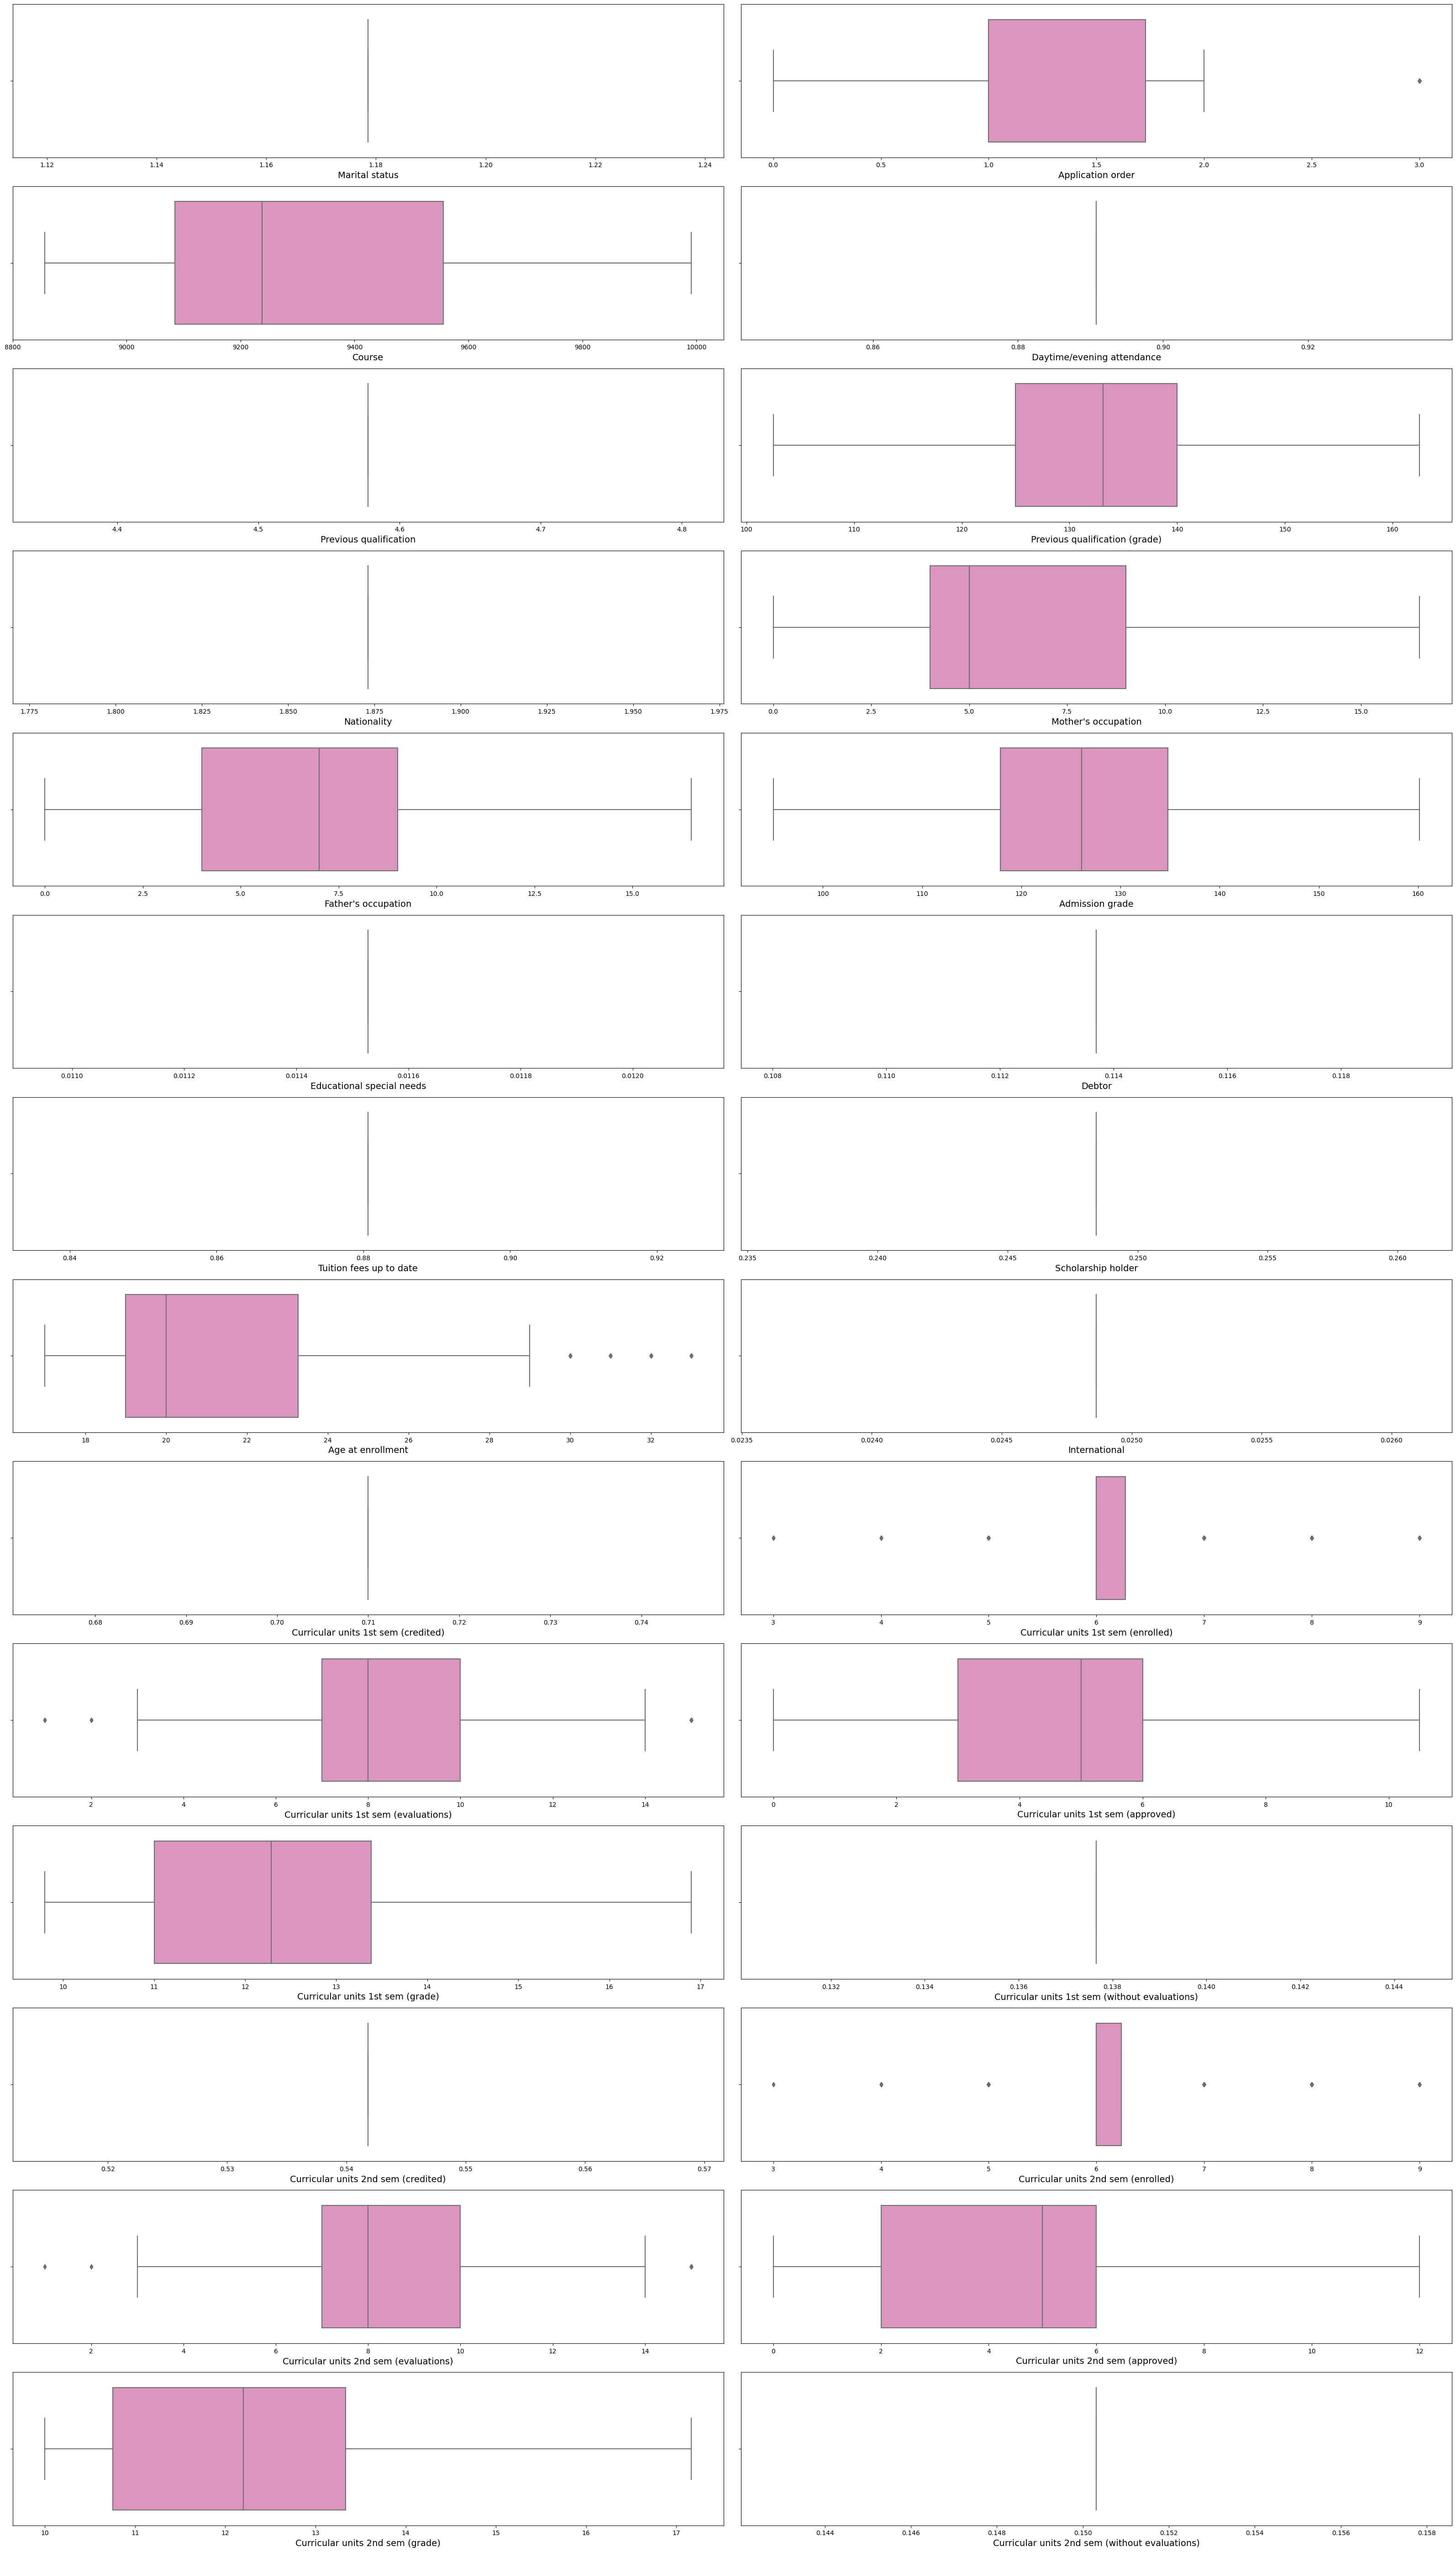

In [23]:
# treating outliers
treat_outliers(df, columns_to_remove_outliers)

# to check the distribution of the remaining columns 
plot_number = 1

num_plots = len(columns_to_remove_outliers) - 1 if len(columns_to_remove_outliers)%2 != 0 else len(columns_to_remove_outliers)

plt.figure(figsize = (num_plots + 4, num_plots * 2), facecolor = "white")

for column in columns_to_remove_outliers:     
    # plot the boxplots
    if plot_number <= num_plots:
        ax = plt.subplot(int(num_plots/2), 2, plot_number)
        sns.boxplot(df[column], palette = "Set2_r")
        plt.xlabel(column, fontsize = 14)
        plt.yticks(rotation = 0, fontsize = 14)
        
    plot_number += 1
    
plt.tight_layout()

As we can see from the above plots, the columns with oultiers have been treated.

### Encoding categorical columns

In [24]:
# encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))

df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.178571,17,1.727848,8856.642631,0.890823,4.577758,122.0,1.873192,19,12,...,0.541817,6.232143,8.063291,0,10.230206,0.150316,10.8,1.4,1.74,0
1,1.178571,15,1.000000,9254.000000,0.890823,4.577758,160.0,1.873192,1,3,...,0.541817,6.000000,6.000000,6,13.666667,0.150316,13.9,-0.3,0.79,2
2,1.178571,1,1.727848,9070.000000,0.890823,4.577758,122.0,1.873192,37,37,...,0.541817,6.000000,8.063291,0,10.230206,0.150316,10.8,1.4,1.74,0
3,1.178571,17,2.000000,9773.000000,0.890823,4.577758,122.0,1.873192,38,37,...,0.541817,6.000000,10.000000,5,12.400000,0.150316,9.4,-0.8,-3.12,2
4,1.178571,39,1.000000,8856.642631,0.890823,4.577758,102.5,1.873192,37,38,...,0.541817,6.000000,6.000000,6,13.000000,0.150316,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.178571,1,1.727848,9773.000000,0.890823,4.577758,125.0,1.873192,1,1,...,0.541817,6.000000,8.000000,5,12.666667,0.150316,15.5,2.8,-4.06,2
4420,1.178571,1,2.000000,9773.000000,0.890823,4.577758,120.0,1.873192,1,1,...,0.541817,6.000000,6.000000,2,11.000000,0.150316,11.1,0.6,2.02,0
4421,1.178571,1,1.000000,9500.000000,0.890823,4.577758,154.0,1.873192,37,37,...,0.541817,8.000000,9.000000,1,13.500000,0.150316,13.9,-0.3,0.79,0
4422,1.178571,1,1.000000,9147.000000,0.890823,4.577758,162.5,1.873192,37,37,...,0.541817,5.000000,6.000000,5,12.000000,0.150316,9.4,-0.8,-3.12,2


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   float64
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   float64
 3   Course                                          4424 non-null   float64
 4   Daytime/evening attendance                      4424 non-null   float64
 5   Previous qualification                          4424 non-null   float64
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   float64
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

We have converted the categorical columns into numerical columns using the Ordinal Encoding method.

In [26]:
# statistical summary of numerial
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4.424000e+03,4424.000000,4424.000000,4424.000000,4.424000e+03,4.424000e+03,4424.000000,4.424000e+03,4424.000000,4424.000000,...,4.424000e+03,4424.000000,4424.000000,4424.000000,4424.000000,4.424000e+03,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571e+00,18.669078,1.352117,9343.637442,8.908228e-01,4.577758e+00,132.501831,1.873192e+00,19.561935,22.275316,...,5.418174e-01,6.175625,8.418033,4.406420,12.230137,1.503165e-01,11.566139,1.228029,0.001969,1.178119
std,6.195745e-14,17.484682,0.586626,328.966432,2.320628e-14,2.238463e-13,12.592465,2.886906e-15,15.603186,15.343108,...,4.108290e-15,1.001162,2.299286,2.915854,1.573670,4.857775e-15,2.663850,1.382711,2.269935,0.888243
min,1.178571e+00,1.000000,0.000000,8856.642631,8.908228e-01,4.577758e+00,102.500000,1.873192e+00,1.000000,1.000000,...,5.418174e-01,3.000000,1.000000,0.000000,10.000000,1.503165e-01,7.600000,-0.800000,-4.060000,0.000000
25%,1.178571e+00,1.000000,1.000000,9085.000000,8.908228e-01,4.577758e+00,125.000000,1.873192e+00,2.000000,3.000000,...,5.418174e-01,6.000000,7.000000,2.000000,10.750000,1.503165e-01,9.400000,0.300000,-1.700000,0.000000
50%,1.178571e+00,17.000000,1.000000,9238.000000,8.908228e-01,4.577758e+00,133.100000,1.873192e+00,19.000000,19.000000,...,5.418174e-01,6.000000,8.000000,5.000000,12.200000,1.503165e-01,11.100000,1.400000,0.320000,1.000000
75%,1.178571e+00,39.000000,1.727848,9556.000000,8.908228e-01,4.577758e+00,140.000000,1.873192e+00,37.000000,37.000000,...,5.418174e-01,6.232143,10.000000,6.000000,13.333333,1.503165e-01,13.900000,2.600000,1.790000,2.000000
max,1.178571e+00,57.000000,3.000000,9991.000000,8.908228e-01,4.577758e+00,162.500000,1.873192e+00,44.000000,44.000000,...,5.418174e-01,9.000000,15.000000,12.000000,17.166667,1.503165e-01,16.200000,3.700000,3.510000,2.000000


After encoding the categorical columns we can see all column details here. The counts of all the columns are the same which means there are no null values in the data. This describe method offers insight into more details of the count, mean, std, min, IQR and max values of all the columns.

## Visualizing the correlation between label and features using bar plot

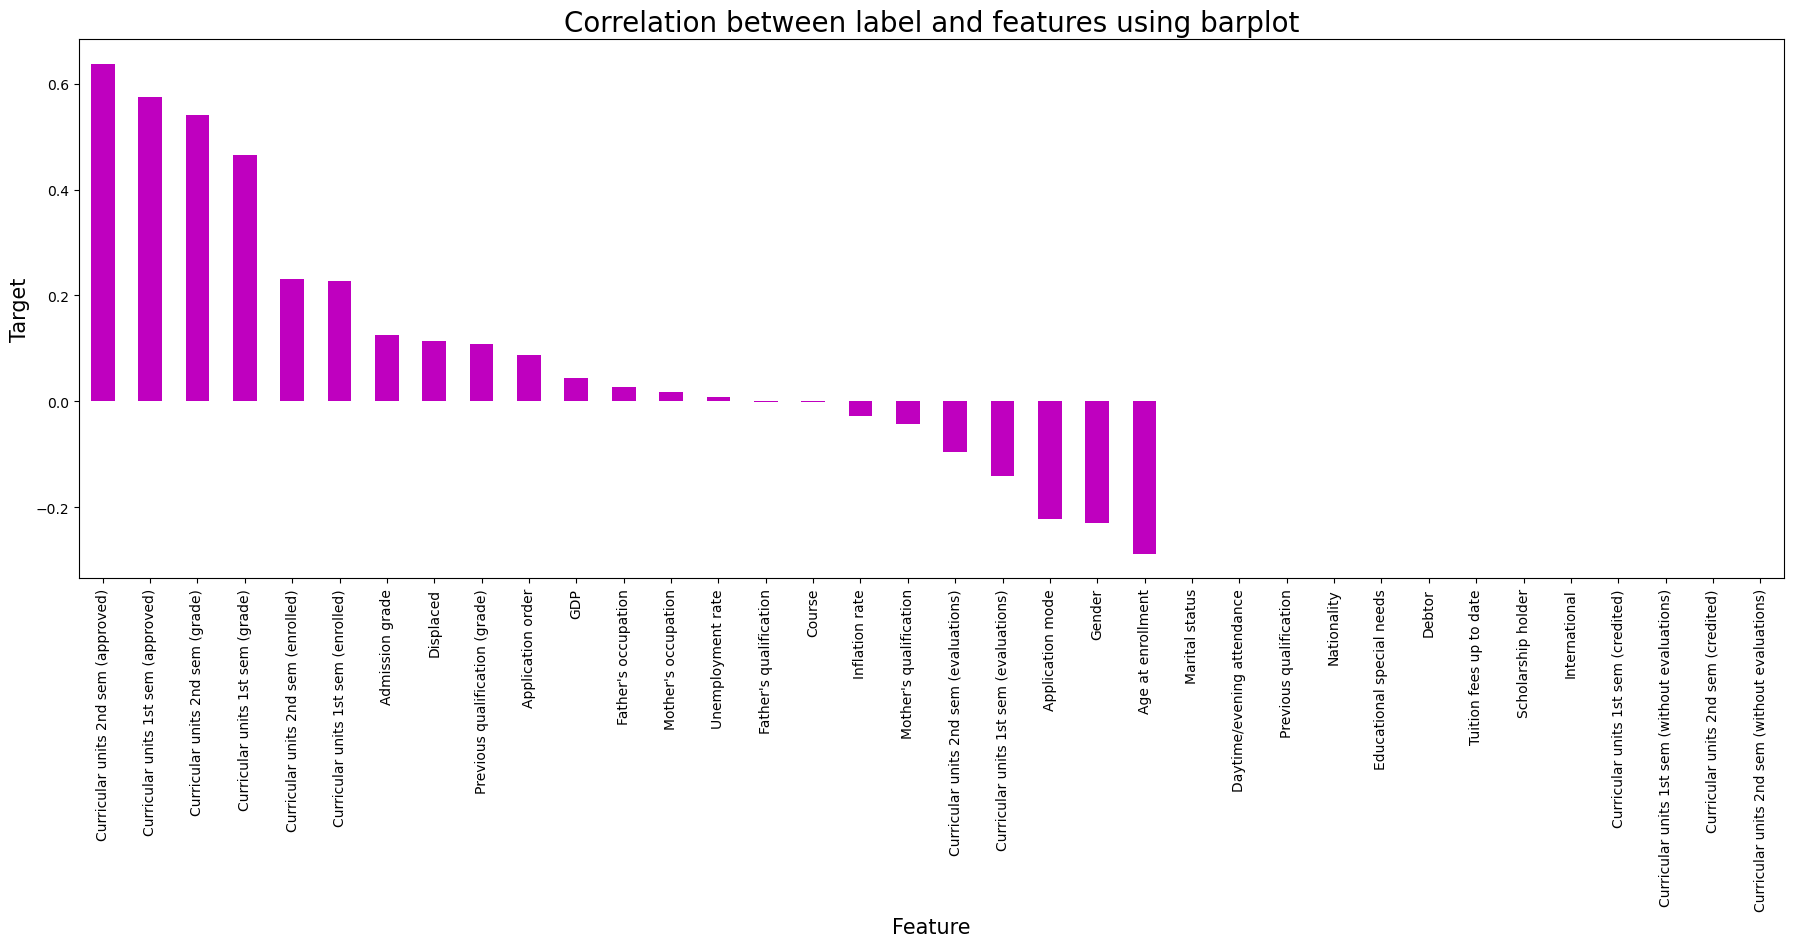

In [27]:
plt.figure(figsize = (22, 7))
df.corr()["Target"].sort_values(ascending = False).drop(["Target"]).plot(kind='bar', color="m")
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title('Correlation between label and features using barplot', fontsize=20)
plt.show()

The above barplot displays the correlation between the label and the features

### Seperating features and the target variable

In [28]:
x = df.drop("Target", axis = 1)
y = df["Target"]

Defining and seperating the features and Target variables

### Feature Scaling using Standard Scalarization

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.0,-0.095470,0.640568,-1.480546,2.220446e-16,0.0,-0.834072,0.0,-0.036018,-0.669778,...,-2.775558e-17,0.0,0.056459,-0.154301,-1.511364,-1.271015,2.775558e-17,-0.287638,0.124386,0.765761
1,0.0,-0.209869,-0.600309,-0.272513,2.220446e-16,0.0,2.183947,0.0,-1.189759,-1.256427,...,-2.775558e-17,0.0,-0.175441,-1.051764,0.546584,0.912956,2.775558e-17,0.876222,-1.105222,0.347199
2,0.0,-1.010660,0.640568,-0.831904,2.220446e-16,0.0,-0.834072,0.0,1.117723,0.959802,...,-2.775558e-17,0.0,-0.175441,-0.154301,-1.511364,-1.271015,2.775558e-17,-0.287638,0.124386,0.765761
3,0.0,-0.095470,1.104548,1.305334,2.220446e-16,0.0,-0.834072,0.0,1.181819,0.959802,...,-2.775558e-17,0.0,-0.175441,0.688103,0.203593,0.107953,2.775558e-17,-0.813253,-1.466871,-1.375511
4,0.0,1.162916,-0.600309,-1.480546,2.220446e-16,0.0,-2.382792,0.0,1.117723,1.024985,...,-2.775558e-17,0.0,-0.175441,-1.051764,0.546584,0.489270,2.775558e-17,0.876222,-1.105222,0.347199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.0,-1.010660,0.640568,1.305334,2.220446e-16,0.0,-0.595807,0.0,-1.189759,-1.386793,...,-2.775558e-17,0.0,-0.175441,-0.181831,0.203593,0.277427,2.775558e-17,1.476924,1.137005,-1.789667
4420,0.0,-1.010660,1.104548,1.305334,2.220446e-16,0.0,-0.992915,0.0,-1.189759,-1.386793,...,-2.775558e-17,0.0,-0.175441,-1.051764,-0.825381,-0.781788,2.775558e-17,-0.175007,-0.454253,0.889126
4421,0.0,-1.010660,-0.600309,0.475368,2.220446e-16,0.0,1.707418,0.0,1.117723,0.959802,...,-2.775558e-17,0.0,1.822463,0.253136,-1.168373,0.807035,2.775558e-17,0.876222,-1.105222,0.347199
4422,0.0,-1.010660,-0.600309,-0.597811,2.220446e-16,0.0,2.382501,0.0,1.117723,0.959802,...,-2.775558e-17,0.0,-1.174393,-1.051764,0.203593,-0.146259,2.775558e-17,-0.813253,-1.466871,-1.375511


We have scaled the data using Standard Scalarization method to overcome the issue of biaseness.

In [30]:
y.value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

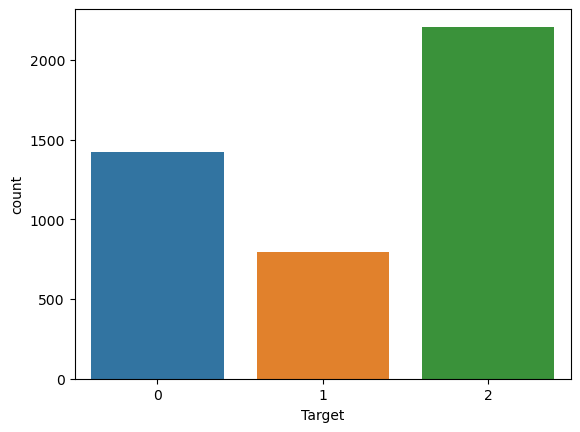

In [31]:
# visualising the target variable unique value
ax = sns.countplot(x=y, data=df)

## Model building (without SMOTE) and Evaluation

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Logistic Regression

In [34]:
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 10)

# create the model
model = LogisticRegression()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.7063253012048193
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       432
           1       0.51      0.15      0.23       254
           2       0.72      0.90      0.80       642

    accuracy                           0.71      1328
   macro avg       0.65      0.60      0.59      1328
weighted avg       0.68      0.71      0.67      1328



## Random Forest

In [35]:
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 10)


# create the model
model = RandomForestClassifier()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.7259036144578314
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       432
           1       0.51      0.24      0.32       254
           2       0.74      0.92      0.82       642

    accuracy                           0.73      1328
   macro avg       0.67      0.63      0.63      1328
weighted avg       0.70      0.73      0.70      1328



## Gradient Boosting

In [36]:
# create the model
model = GradientBoostingClassifier()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.7289156626506024
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       432
           1       0.54      0.28      0.37       254
           2       0.74      0.90      0.82       642

    accuracy                           0.73      1328
   macro avg       0.68      0.64      0.64      1328
weighted avg       0.71      0.73      0.71      1328



## Decision Tree

In [37]:
# create the model
model = DecisionTreeClassifier()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.6189759036144579
              precision    recall  f1-score   support

           0       0.63      0.66      0.64       432
           1       0.30      0.32      0.31       254
           2       0.75      0.71      0.73       642

    accuracy                           0.62      1328
   macro avg       0.56      0.56      0.56      1328
weighted avg       0.63      0.62      0.62      1328



## SVM

In [38]:
# create the model
model = SVC()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.7319277108433735
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       432
           1       0.53      0.25      0.34       254
           2       0.74      0.92      0.82       642

    accuracy                           0.73      1328
   macro avg       0.68      0.63      0.64      1328
weighted avg       0.71      0.73      0.71      1328



## K-NN

In [39]:
# create the model
model = KNeighborsClassifier()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.6724397590361446
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       432
           1       0.39      0.22      0.28       254
           2       0.72      0.84      0.78       642

    accuracy                           0.67      1328
   macro avg       0.60      0.58      0.58      1328
weighted avg       0.64      0.67      0.65      1328



## Model comparison (without SMOTE)

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.datasets import load_iris  # Example dataset
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize models
models = [
    ("Logistic Regression", make_pipeline(StandardScaler(), LogisticRegression())),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("SVM", make_pipeline(StandardScaler(), SVC(probability=True))),
    ("KNN", make_pipeline(StandardScaler(), KNeighborsClassifier())),
    ("Decision Tree", DecisionTreeClassifier())
]

# Prepare a list for storing results
results = []

# Train, predict, and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Collecting metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Appending results
    results.append([name, accuracy, f1, precision, recall])

# Creating a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

# Displaying the DataFrame
print(results_df)


                 Model  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.706325  0.667944   0.677076  0.706325
1        Random Forest  0.722892  0.696978   0.701562  0.722892
2    Gradient Boosting  0.728916  0.708327   0.710612  0.728916
3                  SVM  0.731928  0.706597   0.712140  0.731928
4                  KNN  0.673193  0.651785   0.644694  0.673193
5        Decision Tree  0.625000  0.627353   0.630623  0.625000


## Oversampling Method (SMOTE)

In [41]:
# oversampling the data
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

We applied SMOTE here. SMOTE which stands for Synthetic Minority Over-sampling Technique, is a powerful technique for dealing with unbalanced dataset by generating synthetic samples, thus facilitating more robust and accurate machine learning models, especially in the cases where the minority class is of great interest.

In [42]:
y1.value_counts()

Target
0    2209
2    2209
1    2209
Name: count, dtype: int64

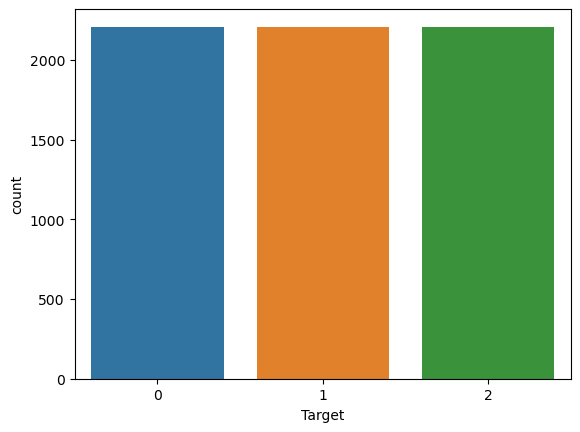

In [43]:
# visualising the target variable unique value
ax = sns.countplot(x=y1, data=df)

We now have a balanced data

## Model Building with SMOTE and Evaluation

We aim to build six machine learning models, see the performance of each model and select the best performed model for the project

## Logistic Regresion

In [44]:
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 10)

# create the model
model = LogisticRegression()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.690296631473102
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       641
           1       0.63      0.62      0.62       671
           2       0.71      0.75      0.73       677

    accuracy                           0.69      1989
   macro avg       0.69      0.69      0.69      1989
weighted avg       0.69      0.69      0.69      1989



We divided our dataset ino training (70%) and testing(30%), builded and evaluated Logistic Regression Model with above displayed metrics. 

## Random Forest

In [45]:
# create the model
model = RandomForestClassifier()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.8300653594771242
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       641
           1       0.79      0.83      0.81       671
           2       0.83      0.88      0.85       677

    accuracy                           0.83      1989
   macro avg       0.83      0.83      0.83      1989
weighted avg       0.83      0.83      0.83      1989



## Decision Tree

In [46]:
# create the model
model = DecisionTreeClassifier()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.7189542483660131
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       641
           1       0.69      0.70      0.70       671
           2       0.77      0.72      0.75       677

    accuracy                           0.72      1989
   macro avg       0.72      0.72      0.72      1989
weighted avg       0.72      0.72      0.72      1989



## Gradient Boosting

In [47]:
# create the model
model = GradientBoostingClassifier()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.7777777777777778
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       641
           1       0.73      0.75      0.74       671
           2       0.80      0.87      0.83       677

    accuracy                           0.78      1989
   macro avg       0.78      0.78      0.78      1989
weighted avg       0.78      0.78      0.78      1989



## Survey Vector Machine (SVM)

In [48]:
# create the model
model = SVC()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.7757667169431876
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       641
           1       0.72      0.78      0.75       671
           2       0.80      0.81      0.80       677

    accuracy                           0.78      1989
   macro avg       0.78      0.78      0.78      1989
weighted avg       0.78      0.78      0.78      1989



## K-Nearest Neighbors

In [49]:
# create the model
model = KNeighborsClassifier()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.7390648567119156
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       641
           1       0.66      0.87      0.75       671
           2       0.84      0.63      0.72       677

    accuracy                           0.74      1989
   macro avg       0.76      0.74      0.74      1989
weighted avg       0.76      0.74      0.74      1989



We have trained and evaluated six machine learning models which are Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, Survey Vector Machine and K-Nearest neighbors. The performance of each model can be seen in their accuracies, precisions, recalls and F1-scores as displayed above.

## Models Comparison

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.datasets import load_iris  # Example dataset
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize models
models = [
    ("Logistic Regression", make_pipeline(StandardScaler(), LogisticRegression())),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("SVM", make_pipeline(StandardScaler(), SVC(probability=True))),
    ("KNN", make_pipeline(StandardScaler(), KNeighborsClassifier())),
    ("Decision Tree", DecisionTreeClassifier())
]

# Prepare a list for storing results
results = []

# Train, predict, and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Collecting metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Appending results
    results.append([name, accuracy, f1, precision, recall])

# Creating a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

# Displaying the DataFrame
print(results_df)


                 Model  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.690297  0.689843   0.689944  0.690297
1        Random Forest  0.828054  0.827893   0.829802  0.828054
2    Gradient Boosting  0.778281  0.777363   0.778721  0.778281
3                  SVM  0.776772  0.776993   0.779491  0.776772
4                  KNN  0.740573  0.739330   0.758510  0.740573
5        Decision Tree  0.730015  0.730268   0.730676  0.730015


By comparing the performance of the six models, we can see that Random Forest ranked the best performing model with an accuracy of 83%. we can see that all the models generalized well as they maintain a balanced data across other metrics like F1-scores, precisions Recall etc

In [51]:
x1 = x1.iloc[:, [3, 6, 12, 13, 22, 24, 25, 28, 30, 31]]
x1

,Course,Previous qualification (grade),Admission grade,Displaced,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,-1.480546,-0.834072,0.035097,0.907512,0.205781,-1.681426,-1.197930,0.056459,-1.511364,-1.271015
1,-0.272513,2.183947,1.121187,0.907512,-0.105318,0.519569,1.159180,-0.175441,0.546584,0.912956
2,-0.831904,-0.834072,-0.143537,0.907512,-0.105318,-1.681426,-1.197930,-0.175441,-1.511364,-1.271015
3,1.305334,-0.834072,-0.515094,0.907512,-0.105318,0.519569,0.758213,-0.175441,0.203593,0.107953
4,-1.480546,-2.382792,1.049734,-1.101914,-0.105318,0.152736,-0.010307,-0.175441,0.546584,0.489270
...,...,...,...,...,...,...,...,...,...,...
6622,-1.480546,-1.134730,-1.313064,0.907512,-0.105318,-0.204161,0.229925,-0.175441,-0.306249,-0.086126
6623,-1.480546,-0.408383,-0.511175,0.907512,0.205781,-1.681426,-1.197930,0.056459,-1.511364,-1.271015
6624,-0.765429,0.595516,0.942554,0.907512,-0.105318,0.351673,0.152222,-0.175441,-0.244054,-0.512503
6625,-1.480546,-0.370660,1.168557,0.527753,0.205781,-1.681426,-1.197930,0.056459,-1.511364,-1.271015


Here, we selected features that have strong influence or correlation with the target variable. The next is to retrain our models with the selected 10 features. 

# Retraining the Models on the Selected Features

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Logistic Regression

In [53]:
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.20, random_state = 0)

# create the model
model = LogisticRegression()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.6478129713423831
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       455
           1       0.55      0.53      0.54       435
           2       0.68      0.74      0.71       436

    accuracy                           0.65      1326
   macro avg       0.65      0.65      0.65      1326
weighted avg       0.65      0.65      0.65      1326



## Random Forest

In [54]:
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.20, random_state = 10)

# create the model
model = RandomForestClassifier()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.7812971342383107
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       430
           1       0.73      0.76      0.74       445
           2       0.80      0.86      0.83       451

    accuracy                           0.78      1326
   macro avg       0.78      0.78      0.78      1326
weighted avg       0.78      0.78      0.78      1326



## Decision Tree

In [55]:
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.20, random_state = 10)

# create the model
model = DecisionTreeClassifier()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.6990950226244343
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       430
           1       0.66      0.66      0.66       445
           2       0.78      0.74      0.76       451

    accuracy                           0.70      1326
   macro avg       0.70      0.70      0.70      1326
weighted avg       0.70      0.70      0.70      1326



## Gradient Boosting

In [56]:
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.20, random_state = 10)

# create the model
model = GradientBoostingClassifier()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.7722473604826546
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       430
           1       0.72      0.73      0.73       445
           2       0.79      0.88      0.83       451

    accuracy                           0.77      1326
   macro avg       0.77      0.77      0.77      1326
weighted avg       0.77      0.77      0.77      1326



## Survey Vector Machine (SVM)

In [57]:
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.20, random_state = 0)

# create the model
model = SVC()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.720211161387632
              precision    recall  f1-score   support

           0       0.79      0.62      0.69       455
           1       0.64      0.69      0.67       435
           2       0.75      0.85      0.80       436

    accuracy                           0.72      1326
   macro avg       0.73      0.72      0.72      1326
weighted avg       0.73      0.72      0.72      1326



## K-Nearest Neighbors

In [58]:
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.20, random_state = 0)

# create the model
model = KNeighborsClassifier()

# train the model
model.fit(x_train, y_train)

# evaluate the model performance
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test, prediction))

Accuracy:  0.7368024132730016
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       455
           1       0.68      0.74      0.71       435
           2       0.78      0.76      0.77       436

    accuracy                           0.74      1326
   macro avg       0.74      0.74      0.74      1326
weighted avg       0.74      0.74      0.74      1326



We can see that after retraining the models with selected features, Random forest still merged the best performed model. The next si to tune our model

## Models Comparison with the Selected Features

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.datasets import load_iris  # Example dataset
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.20, random_state = 0)

# Initialize models
models = [
    ("Logistic Regression", make_pipeline(StandardScaler(), LogisticRegression())),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("SVM", make_pipeline(StandardScaler(), SVC(probability=True))),
    ("KNN", make_pipeline(StandardScaler(), KNeighborsClassifier())),
    ("Decision Tree", DecisionTreeClassifier())
]

# Prepare a list for storing results
results = []

# Train, predict, and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Collecting metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Appending results
    results.append([name, accuracy, f1, precision, recall])

# Creating a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

# Displaying the DataFrame
print(results_df)

                 Model  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.647813  0.646831   0.646791  0.647813
1        Random Forest  0.787330  0.785360   0.790537  0.787330
2    Gradient Boosting  0.736048  0.733473   0.736987  0.736048
3                  SVM  0.720211  0.718243   0.726086  0.720211
4                  KNN  0.733786  0.734315   0.736511  0.733786
5        Decision Tree  0.708899  0.709006   0.710241  0.708899


### K-Fold Cross Validation

In [60]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Model definition
model = RandomForestClassifier(random_state=42)

# Setup KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []
for train_index, test_index in kf.split(x1):
    x_train, x_test = x1.iloc[train_index], x1.iloc[test_index]
    y_train, y_test = y1[train_index], y1[test_index]
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions and evaluate
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)

# Convert scores to a numpy array for mean and std calculations
scores = np.array(scores)

# Print the accuracy for each fold
print(f"Accuracy for each fold: {scores}")

# Print the mean accuracy and standard deviation
print(f"Mean accuracy: {scores.mean()}, Standard deviation: {scores.std()}")


Accuracy for each fold: [0.77828054 0.76621418 0.78716981 0.7909434  0.80679245]
Mean accuracy: 0.7858800762685336, Standard deviation: 0.013484276625774071


### AUC-ROC Scores and Multi-class ROC Curve

Precision: 0.8094554742207221
Recall: 0.8068054570357757
F1 Score: 0.805841884947253
AUC-ROC: 0.9245989041167908


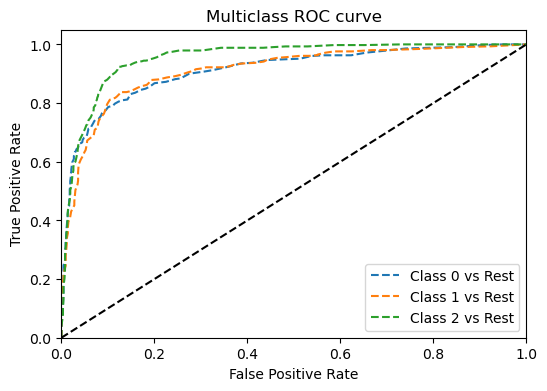

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define and fit the model 
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Predict class labels for the test set
y_pred = model.predict(x_test)

# Predict probabilities for all classes
y_probs = model.predict_proba(x_test)

# Calculate AUC-ROC Score
# For multiclass, calculate ROC AUC for each class and average them
roc_auc = roc_auc_score(y_test, y_probs, multi_class="ovr")

# Calculate metrics using 'macro' average for multiclass data
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")

# Plotting ROC Curve for Multiclass  one-vs-rest
fpr = {}
tpr = {}
thresh ={}
n_class = len(set(y_test))

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_probs[:,i], pos_label=i)
    
plt.figure(figsize=(6, 4))
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i} vs Rest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC curve')
plt.legend(loc="lower right")
plt.show()


## ROC for Multi-class

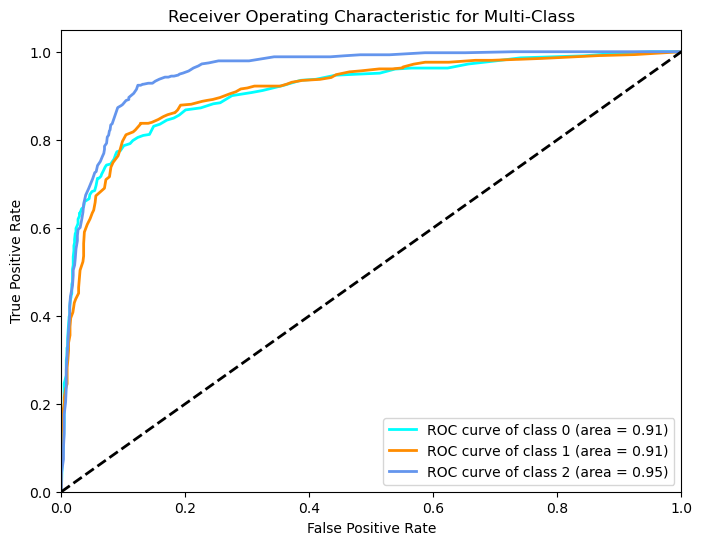

In [62]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels for multi-class classification
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2]) 
# Compute ROC curve and ROC area for each class
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

# Predict probabilities for each class
y_scores = model.predict_proba(x_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()


## Confusion Matrix

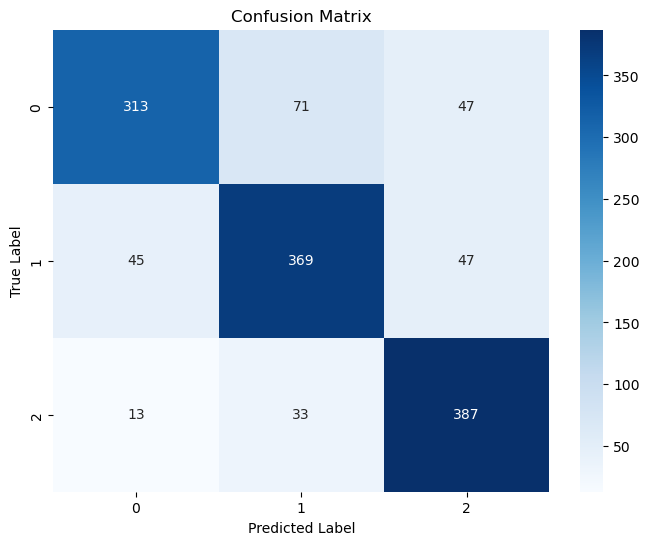

In [63]:
from sklearn.ensemble import RandomForestClassifier

# As training data in x_train and labels in y_train
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)


from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get model predictions
y_pred = model.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


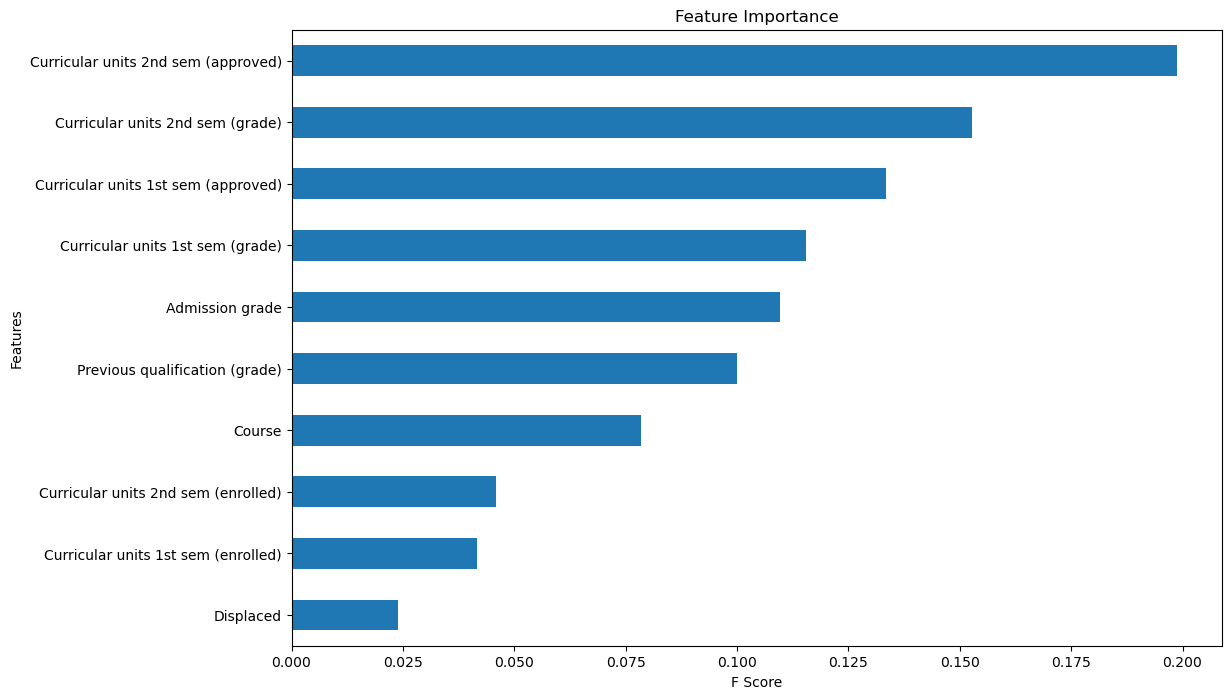

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# As training data in x_train and labels in y_train
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Use the 'model' variable to access feature_importances_ since that's where your trained model is stored
feature_importances = model.feature_importances_
feature_names = x_train.columns

# Create a pandas series to visualize importance
importances = pd.Series(feature_importances, index=feature_names)

# Plot feature importance
plt.figure(figsize=(12, 8))
importances.nlargest(10).sort_values().plot(kind='barh')  # adjust the number as needed
plt.title('Feature Importance')
plt.xlabel('F Score')
plt.ylabel('Features')
plt.show()



we tuned the best performed model with GridsearchCV to avoid model biaseness

# Explainable (XAI) Machine Learning Model
Explainable Artificial Intelligence (XAI) refers to methods and techniques in the field of artificial intelligence (AI) that make the results and operations of AI systems understandable and interpretable to humans. Therefore, we deploy SHAP to achieve this.

SHAP (SHapley Additive exPlanations) is a game theory-based approach for explaining the output of any machine learning model. It offers insights into how each feature in your dataset contributes to the prediction for each individual observation. SHAP values provide a measure of the impact of each feature on the prediction, compared to the average prediction for the dataset. This approach is grounded in the principles of cooperative game theory and offers a consistent and fair method to distribute the "payout" (i.e., the prediction) among the "players" (i.e., the features)
## Why SHAP?
### Individual Prediction Explanation:
SHAP can explain the output of the model for individual predictions, which is especially useful in applications where understanding why a model made a specific prediction is important.
### Global Understanding:
SHAP also provides global insights by aggregating individual explanations, helping to understand how features generally impact predictions across the dataset.
### Consistency and Fairness:
SHAP values have desirable properties like consistency and local accuracy, which support fairness and transparency in model explanations.

In [65]:
from sklearn.ensemble import RandomForestClassifier

# As training data in x_train and labels in y_train
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [66]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [67]:
import shap
# The trained RandomForestClassifier
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)  # x_test is your test set features



## Shap Summary Plot for All Classes

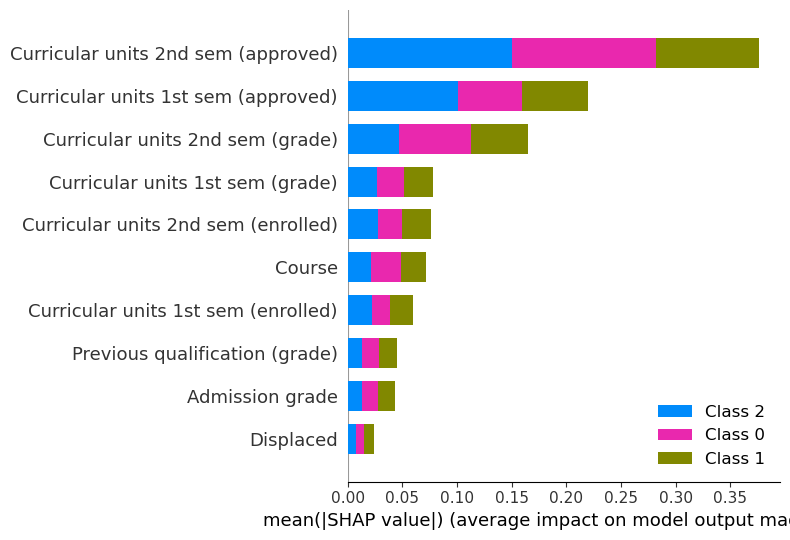

In [68]:
# Summary plot for all classes
shap.summary_plot(shap_values, x_test, plot_type="bar")


the above summary plot unveils the average impact of each feature in a particular class on the model prediction. This offers more insight on which features contributing to either positively or negatively to why the model made decision.

## Shap Summary Plot for Class 2

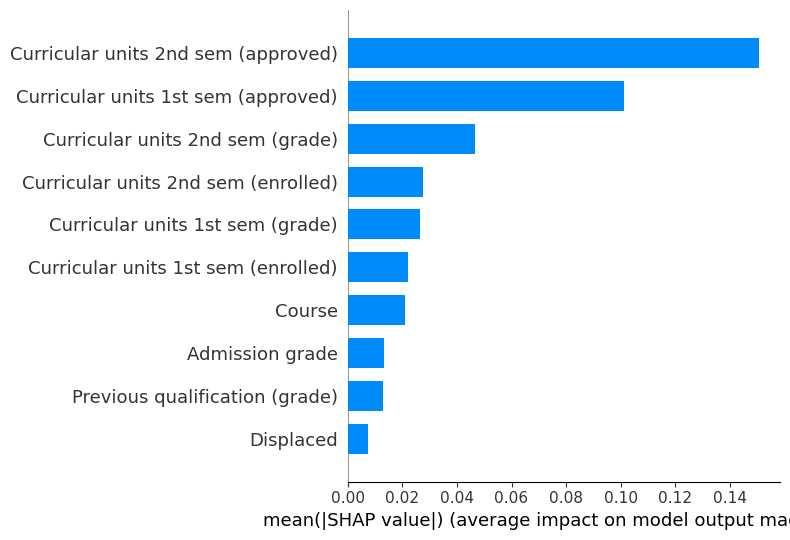

In [69]:
# For class 2
shap.summary_plot(shap_values[2], x_test, plot_type="bar")


## Shap Summary Plot for Class 1

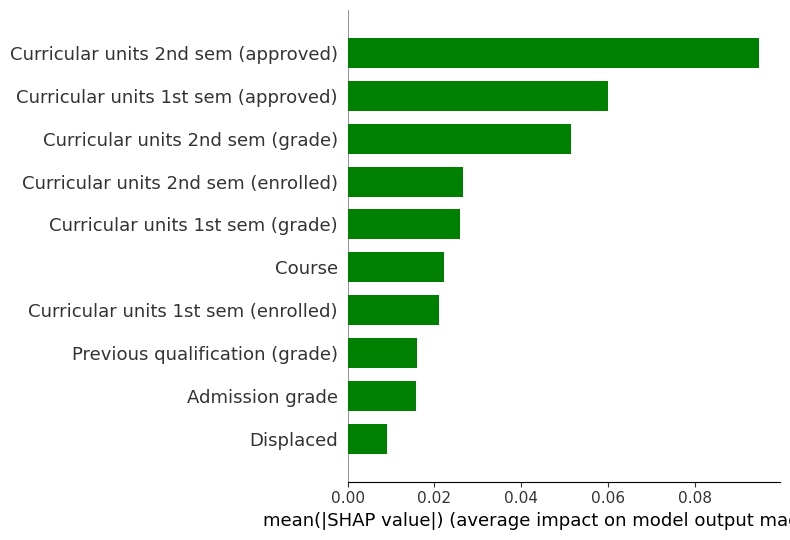

In [70]:
# For class 1
shap.summary_plot(shap_values[1], x_test, plot_type="bar", color='green')


## Shap Summary Plot for Class 0

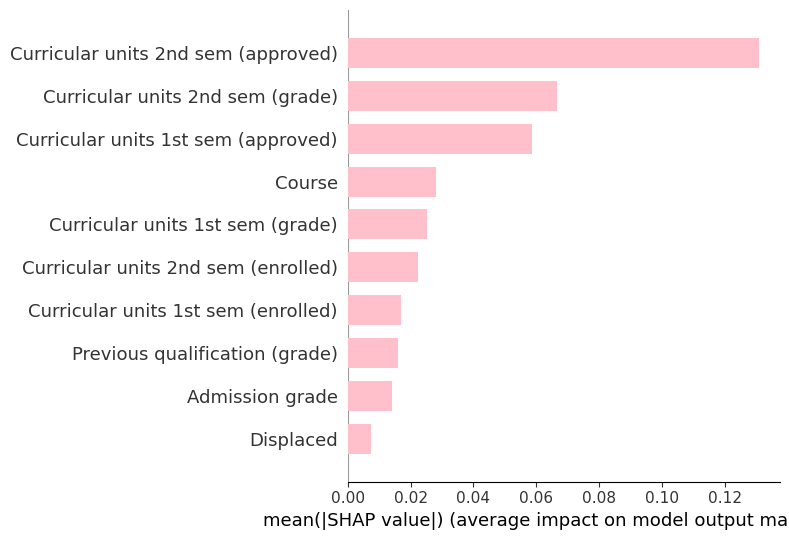

In [71]:
# For class 0
shap.summary_plot(shap_values[0], x_test, plot_type="bar", color='pink')

From the three (3) barplot above, we can see Shap summary plot on each of the three classes showing clearly, the contribution of each feature in across the 3 classes.


In [72]:
# Initialize JavaScript visualization
shap.initjs()

In [73]:
# Create TreeExplainer object
explainer = shap.TreeExplainer(model)

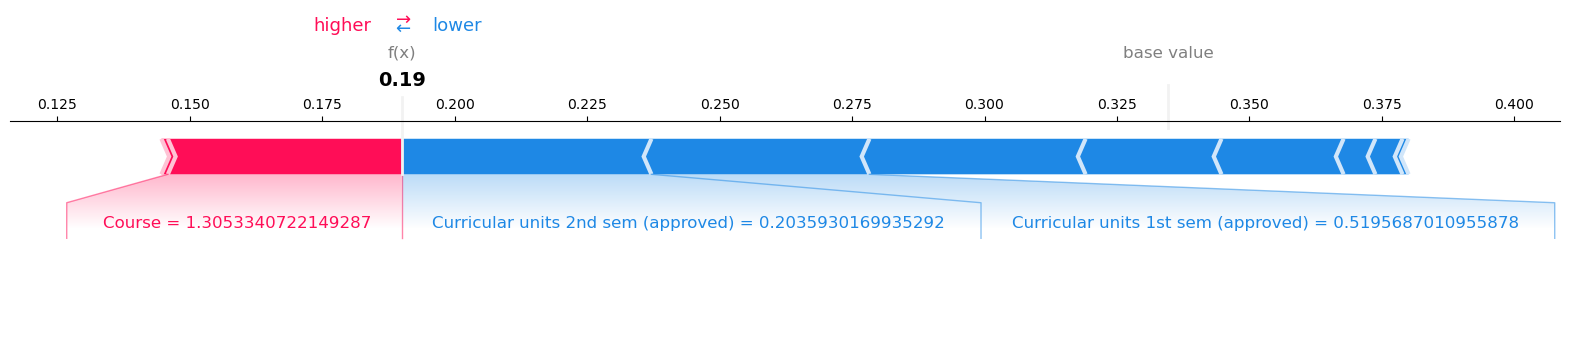

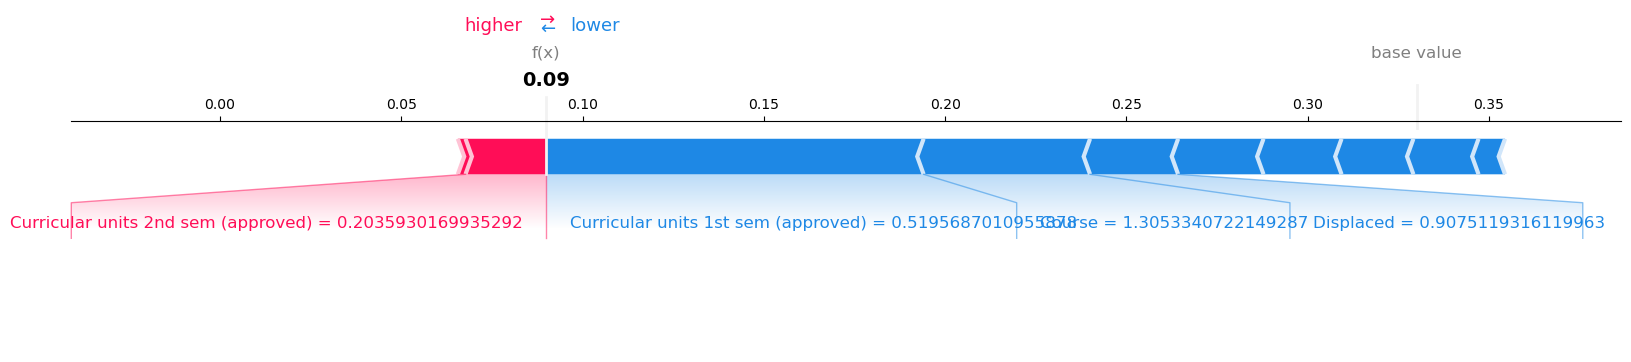

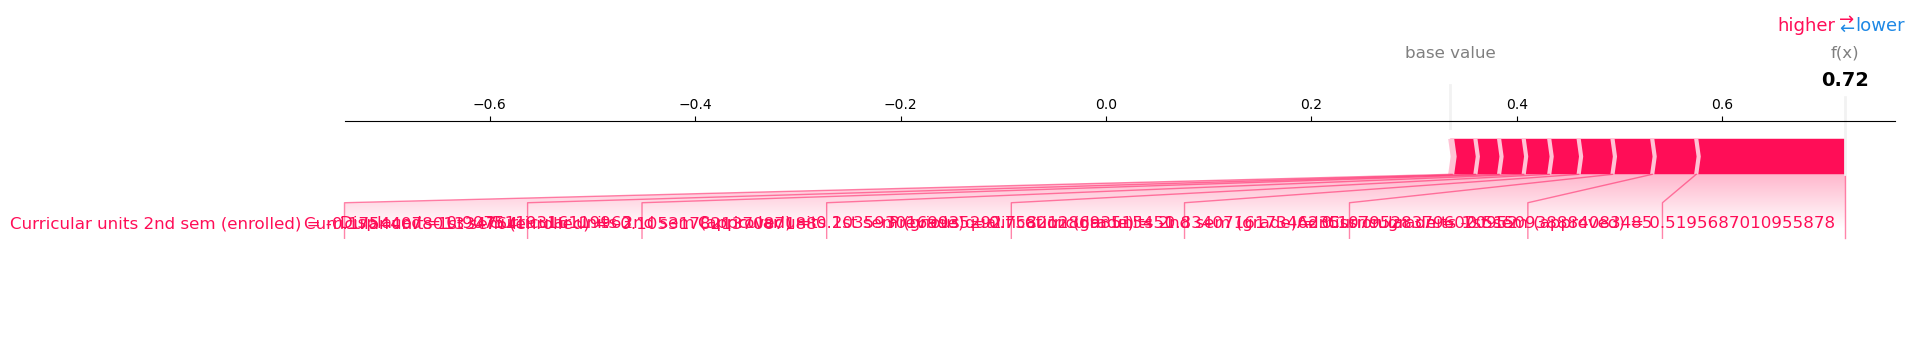

In [74]:
# Calculate SHAP values for x_test
shap_values = explainer.shap_values(x_test)

# Define class names for readability
class_names = ['DROPOUT', 'ENROLLED', 'GRADUATE']

# Generate and display force plots for each class for the first instance in x_test
for class_idx in range(model.n_classes_):
    # Display the force plot for the first instance in the test set
    shap.force_plot(
        base_value=explainer.expected_value[class_idx], 
        shap_values=shap_values[class_idx][0],         
        features=x_test.iloc[0,:],                      
        feature_names=x1.columns.tolist(),              
        matplotlib=True                              
    )


The Shap force plots for the 3 classes above indicates the impact of each feature on the predictions. those on red indicates they are pushing higher while blue shows lower impacts.

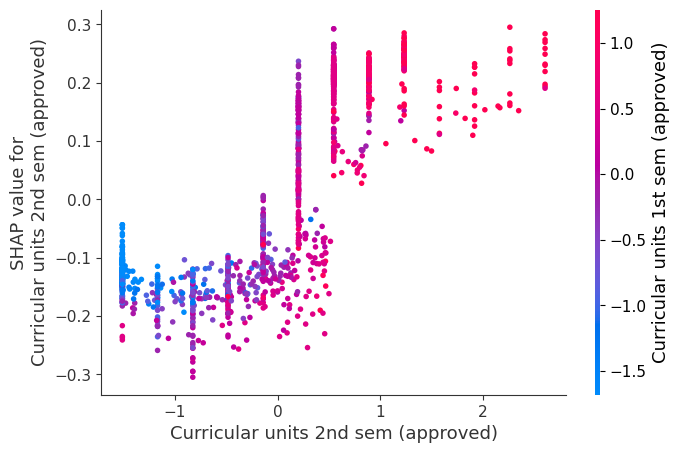

In [75]:
shap.dependence_plot('Curricular units 2nd sem (approved)', shap_values[2], x_test)


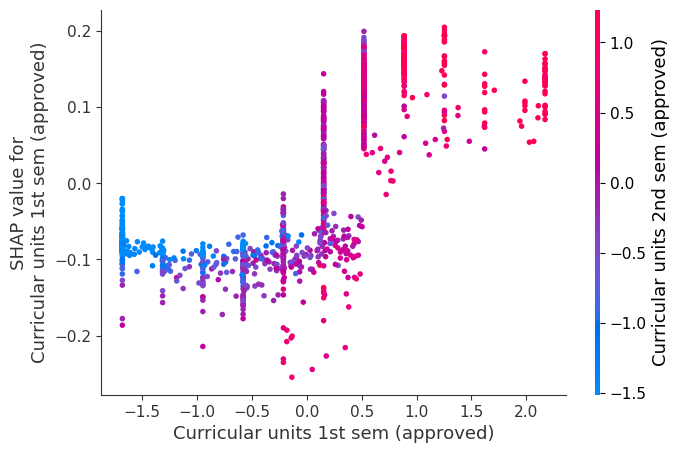

In [76]:
shap.dependence_plot('Curricular units 1st sem (approved)', shap_values[2], x_test)
